In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
OVER_2_5 = 'over_2_5'
UNDER_2_5 = 'under_2_5'
HOME_GOALS = 'home_goals'
AWAY_GOALS = 'away_goals'

In [10]:
import pandas as pd

# Replace 'your_file.csv' with the actual path to your CSV file
file_path = 'sport_odds_data.csv'
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)

# Now you can work with the DataFrame 'df' as needed
#print(df.head())  


In [11]:
## Filtering only past events

from datetime import datetime

# Convert the "commence_time" column to datetime
df['commence_time'] = pd.to_datetime(df['commence_time'])

# Get the current date without the time component
current_date = datetime.now().date()

# Extract the date component from the "commence_time" column
df['commence_date'] = df['commence_time'].dt.date

# Filter rows where "commence_date" is greater than the current date
filtered_df = df[df['commence_date'] < current_date]

# Drop the temporary "commence_date" column if you don't need it
filtered_df = filtered_df.drop(columns=['commence_date'])

# print(filtered_df)

In [15]:
LOW_ODD_LIMIT = 1.0
UPP_ODD_LIMIT = 4.0 
ODD_STEP_SIZE = 0.2

bins_number = int((UPP_ODD_LIMIT - LOW_ODD_LIMIT) / ODD_STEP_SIZE)

In [16]:
from odds_accuracy_utils import get_match_total_goals, get_bin_index, fill_totals_bins

bins_labels = []
for i in range(0,bins_number):
    bins_labels.append(f"{round(LOW_ODD_LIMIT + i*ODD_STEP_SIZE, 1)}-{round(LOW_ODD_LIMIT + (i+1)*ODD_STEP_SIZE, 1)}")

bins = []
for i in range (0, bins_number):
    bins.append([])

## Filteirng only head-to-head results
for index, row in filtered_df.iterrows():
    match_total_goals = get_match_total_goals(row)
    over_2_5_odd = float(row[OVER_2_5])
    under_2_5_odd = float(row[UNDER_2_5])
    over_2_5_bin_index = get_bin_index(LOW_ODD_LIMIT, UPP_ODD_LIMIT, ODD_STEP_SIZE, over_2_5_odd)
    under_2_5_bin_index = get_bin_index(LOW_ODD_LIMIT, UPP_ODD_LIMIT, ODD_STEP_SIZE, under_2_5_odd)

    bins = fill_totals_bins(bins, match_total_goals, over_2_5_bin_index, under_2_5_bin_index
                     , over_2_5_odd, under_2_5_odd) 

In [17]:
print(bins)
for i in range(0,len(bins)):
    print(f"Bin n° {i+1} is {len(bins[i])}" )

[[], [[0.7352941176470588, True], [0.7352941176470588, True], [0.8333333333333334, True], [0.819672131147541, True], [0.7352941176470588, False], [0.7518796992481203, True], [0.7352941176470588, True]], [[0.6369426751592356, True], [0.6535947712418301, True], [0.6944444444444444, True], [0.6535947712418301, True], [0.6666666666666666, False], [0.6369426751592356, False], [0.6666666666666666, False], [0.6369426751592356, True], [0.6944444444444444, True], [0.6944444444444444, False], [0.6944444444444444, False], [0.6666666666666666, True], [0.6369426751592356, False], [0.6369426751592356, False], [0.6944444444444444, False], [0.6535947712418301, True], [0.6369426751592356, False], [0.7142857142857143, True], [0.6535947712418301, True], [0.6369426751592356, False], [0.6944444444444444, True], [0.6535947712418301, True], [0.6944444444444444, True], [0.6944444444444444, True], [0.7142857142857143, False], [0.7142857142857143, True], [0.6944444444444444, True], [0.6535947712418301, True], [

In [18]:
odds_accuracies = []

for bin in bins:
    cum_exp_value = 0.
    cum_real_value = 0.
    for element in bin:
        cum_exp_value += element[0]
        if element[1]:
            cum_real_value+=1
    odds_accuracies.append([cum_exp_value, cum_real_value])    

In [19]:
print(odds_accuracies)
print(bins_labels)

[[0.0, 0.0], [5.34606163431723, 6.0], [32.090012013297894, 32.0], [54.72155720671698, 49.0], [44.261434209078196, 41.0], [34.22125435540068, 34.0], [19.338703070160868, 16.0], [2.8, 2.0], [7.179736294240108, 6.0], [0.0, 0.0], [1.3333333333333333, 1.0], [0.3076923076923077, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0]]
['1.0-1.2', '1.2-1.4', '1.4-1.6', '1.6-1.8', '1.8-2.0', '2.0-2.2', '2.2-2.4', '2.4-2.6', '2.6-2.8', '2.8-3.0', '3.0-3.2', '3.2-3.4', '3.4-3.6', '3.6-3.8', '3.8-4.0']


In [24]:
norm_odds_accuracies = []

for element in odds_accuracies:
    if (element[0] != 0): #In case no values exists in the bean, cum_real_value will be 0
        norm_odds_accuracies.append(element[1]/element[0])
    else:
        norm_odds_accuracies.append(1)   

# print(norm_odds_accuracies)    

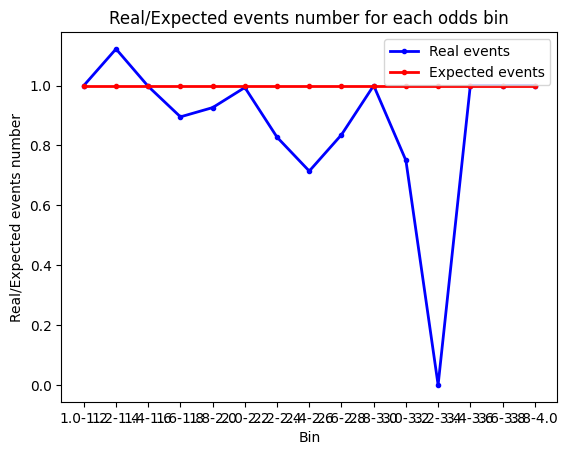

In [25]:
# Create a scatter plot with connecting lines for the first set of data
plt.plot(bins_labels, norm_odds_accuracies, color='blue', marker='.', linestyle='-', linewidth=2, label='Real events')

# Create a scatter plot with connecting lines for the second set of data
plt.plot(bins_labels, np.ones(bins_number), color='red', marker='.', linestyle='-', linewidth=2, label='Expected events')


# Adding labels and title
plt.xlabel('Bin')
plt.ylabel('Real/Expected events number')
plt.title('Real/Expected events number for each odds bin')
plt.legend()

# Show the plot
plt.show()